In [10]:
from sklearn import datasets

iris=datasets.load_iris()

In [11]:
import pandas as pd

X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']
df=pd.concat([X, y], axis=1)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df['Targets'].value_counts()

0    50
1    50
2    50
Name: Targets, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: setosa, 1: versicolor, 2: virginica)')

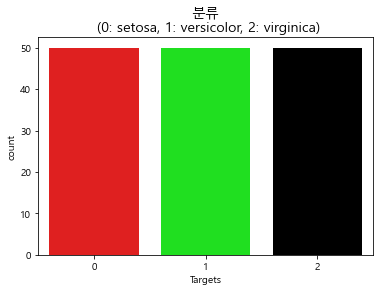

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc('font', family=font_name)

colors=['red','lime', 'black']
sns.countplot('Targets', data=df, palette=colors)
plt.title('분류\n (0: setosa, 1: versicolor, 2: virginica)', fontsize=14)

array([[<AxesSubplot:xlabel='Sepal_Length', ylabel='Sepal_Length'>,
        <AxesSubplot:xlabel='Sepal_Width', ylabel='Sepal_Length'>,
        <AxesSubplot:xlabel='Petal_Length', ylabel='Sepal_Length'>,
        <AxesSubplot:xlabel='Petal_Width', ylabel='Sepal_Length'>,
        <AxesSubplot:xlabel='Targets', ylabel='Sepal_Length'>],
       [<AxesSubplot:xlabel='Sepal_Length', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Sepal_Width', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Petal_Length', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Petal_Width', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Targets', ylabel='Sepal_Width'>],
       [<AxesSubplot:xlabel='Sepal_Length', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Sepal_Width', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Petal_Length', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Petal_Width', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Targets', ylabel='Petal_Length'>],
   

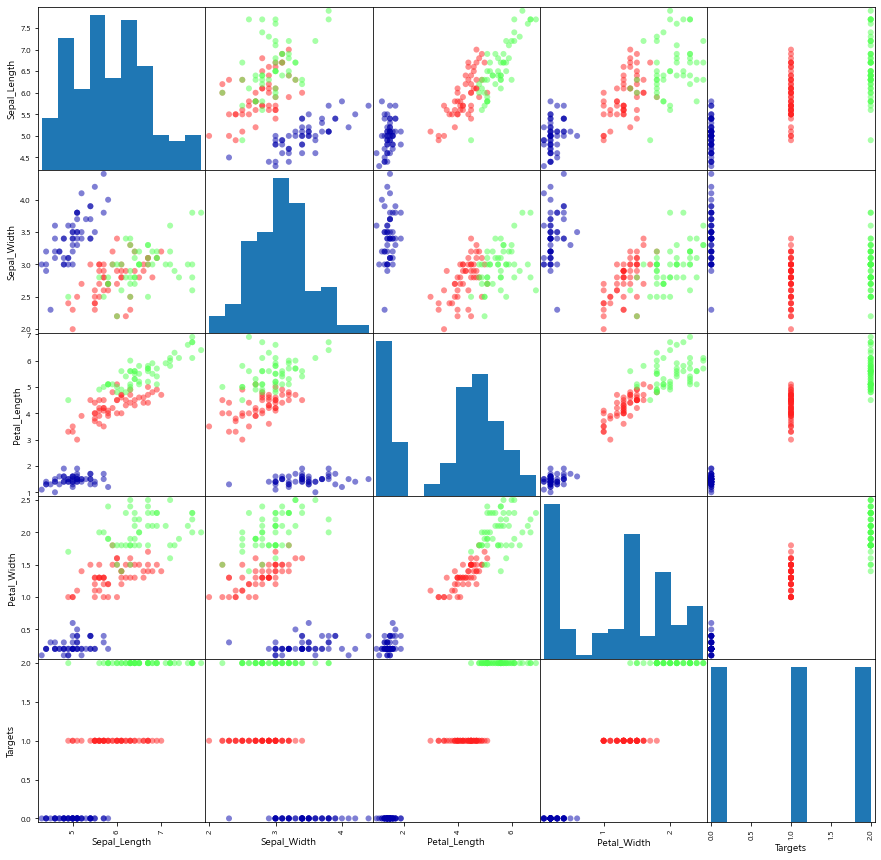

In [14]:
# 산점도 행렬 출력
import mglearn

pd.plotting.scatter_matrix(df, c=iris.target, figsize=(15,15), marker='o', cmap=mglearn.cm3)
# 세 클래스가 비교적 잘 구분되고 있으므로 기계학습하기에 적합한 데이터임

Text(0.5, 1.0, '꽃잎')

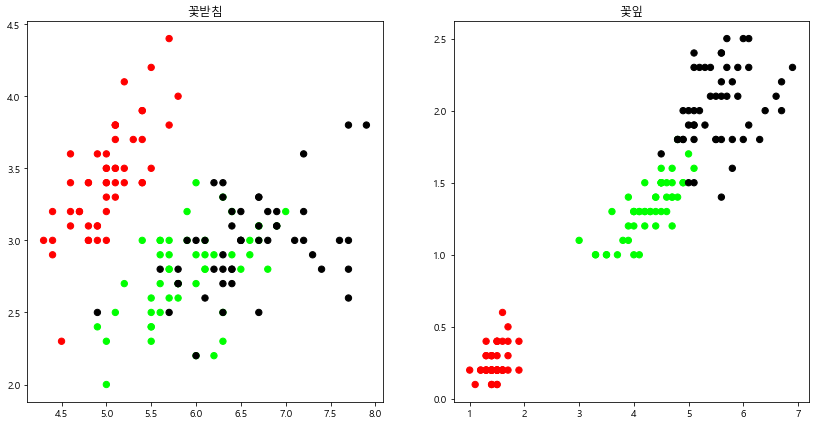

In [16]:
import numpy as np

plt.figure(figsize=(14,7)) # 그래프 사이즈
colormap=np.array(['red','lime','black']) # 색상 배열
# 꽃받침 기준 그래프
plt.subplot(1,2,1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('꽃받침')
# 꽃잎 기준 그래프
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('꽃잎')

In [17]:
# KMeans Cluster 모델 생성
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state=0) # 클러스터 3개
model.fit(X)

KMeans(n_clusters=3, random_state=0)

In [18]:
model.labels_ # clustering 결과

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, '클러스터링 결과')

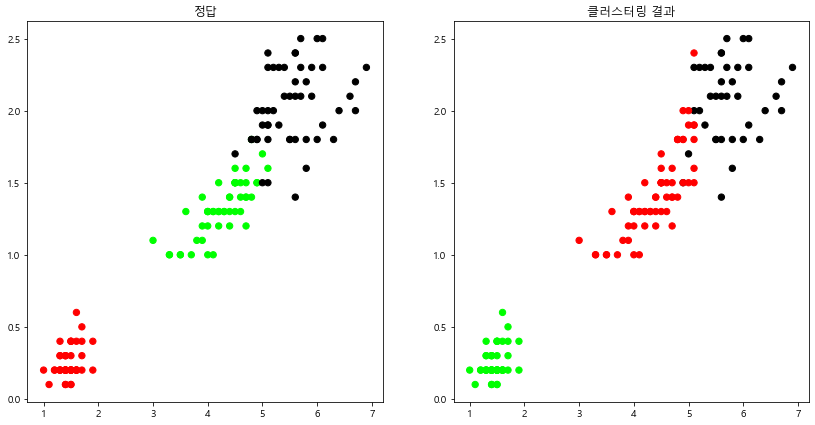

In [19]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
# 그래프 출력(정답)
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('정답')
# 그래프 출력(클러스터링)
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('클러스터링 결과')
# 클러스터링은 비교적 잘 되었으나 색상이 다름(label이 다르게 매겨짐)
# 그룹이 잘 나누어지므로 라벨 번호는 중요하지 않음

In [20]:
# label 순번 변경 → [0,1,2]에서 [1,0,2]로 변경
pred=np.choose(model.labels_,[1,0,2]).astype(np.int64)
print(model.labels_)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5, 1.0, '클러스터링 결과')

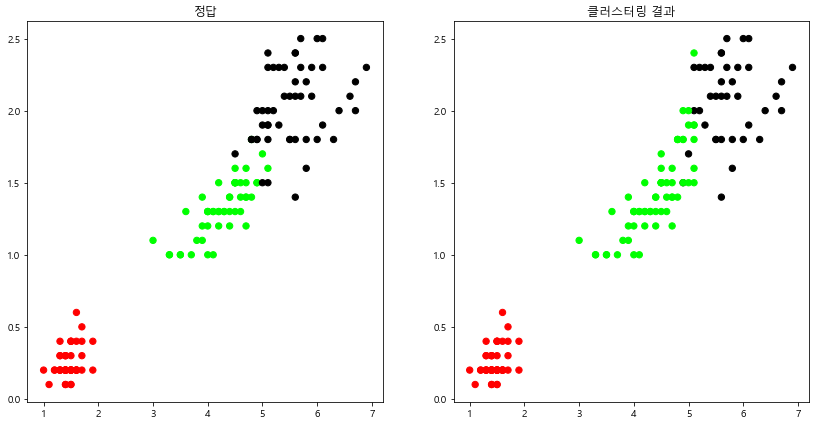

In [21]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
# 그래프 출력(정답)
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('정답')
# 그래프 출력(예측)
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[pred], s=40)
plt.title('클러스터링 결과')

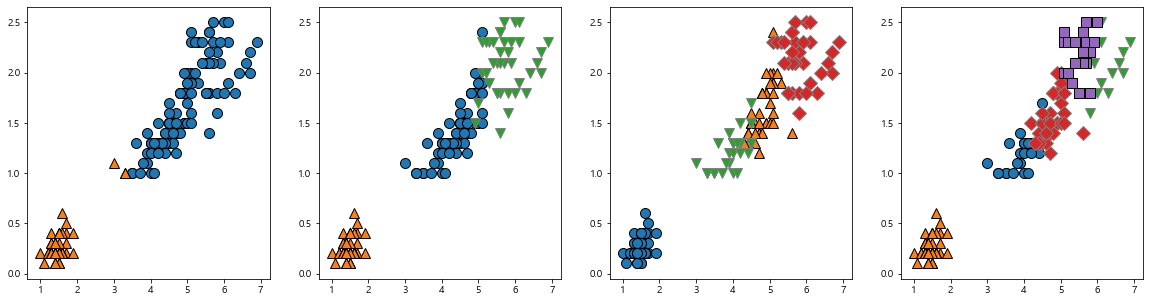

In [22]:
# 같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
fig, axes=plt.subplots(1,4,figsize=(20,5)) # 1행 4열의 서브 플롯 생성

# 2, 3, 4, 5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls=kmeans.labels_
    mglearn.discrete_scatter(X["Petal_Length"], X["Petal_Width"], lbls, ax=axes[idx])
    idx+=1